<a href="https://colab.research.google.com/github/farrokhkarimi/densepose/blob/main/densepose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 14392, done.
remote: Total 14392 (delta 0), reused 0 (delta 0), pack-reused 14392
Receiving objects: 100% (14392/14392), 5.89 MiB | 3.21 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


In [10]:
cd detectron2/projects/DensePose/

/content/detectron2/projects/DensePose


In [3]:
ls

apply_net.py*  densepose/  doc/          README.md  tests/
configs/       dev/        query_db.py*  setup.py   train_net.py*


In [11]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-l48b31ta
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-l48b31ta
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 79 kB 7.0 MB/s 
     |████████████████████████████████| 151 kB 66.5 MB/s 
     |████████████████████████████████| 1.4 MB 65.2 MB/s 
     |████████████████████████████████| 431 kB 70.8 MB/s 
     |████████████████████████████████| 248 kB 71.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 50.6 MB/s 
     |████████████████████████████████| 96 kB 6.5 MB/s 
     |████████████████████████████████| 596 kB 72.5 MB/s 
     |████████

In [12]:
pip install av

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.2 MB 1.4 MB/s 


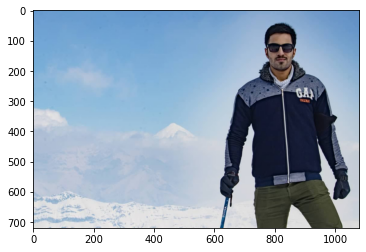

In [13]:
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('https://farrokhkarimi.github.io/images/gallery/modals/kolakchal-m.jpg')
io.imsave('image.jpg', image)

plt.imshow(image)
plt.show()

In [19]:
# Downloading the model from the Model Zoo
# https://github.com/facebookresearch/detectron2/blob/main/projects/DensePose/configs/densepose_rcnn_R_50_FPN_DL_s1x.yaml
!wget https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_DL_s1x/165712097/model_final_0ed407.pkl

--2022-06-30 16:10:18--  https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_DL_s1x/165712097/model_final_0ed407.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264702351 (252M) [binary/octet-stream]
Saving to: ‘model_final_0ed407.pkl’

model_final_0ed407. 100%[===================>] 252.44M  32.0MB/s    in 7.8s    

2022-06-30 16:10:27 (32.2 MB/s) - ‘model_final_0ed407.pkl’ saved [264702351/264702351]



In [ ]:
ls

apply_net.py*                        doc/                    setup.py
configs/                             image.jpg               tests/
densepose/                           model_final_0ed407.pkl  train_net.py*
densepose_rcnn_R_50_FPN_DL_s1x.yaml  query_db.py*
dev/                                 README.md


In [23]:
# Running the test script
# Help : https://github.com/facebookresearch/detectron2/blob/main/projects/DensePose/doc/TOOL_APPLY_NET.md
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_DL_s1x.yaml model_final_0ed407.pkl image.jpg dp_contour,bbox,dp_u,dp_v --output image_densepose_contour.png

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/detectron2/projects/DensePose/densepose/vis/densepose_results.py:133: UserWarning: The following kwargs were not used by contour: 'cfg', 'texture_atlas', 'texture_atlases_dict'
  plt.contour(u, self.levels, extent=extent, **self.plot_args)
/content/detectron2/projects/DensePose/densepose/vis/densepose_results.py:134: UserWarning: The following kwargs were not used by contour: 'cfg', 'texture_atlas', 'texture_atlases_dict'
  plt.contour(v, self.levels, extent=extent, **self.plot_args)


In [ ]:
ls

apply_net.py*  doc/                              query_db.py*  train_net.py*
configs/       image_densepose_contour.0001.png  README.md
densepose/     image.jpg                         setup.py
dev/           model_final_c4ea5f.pkl            tests/


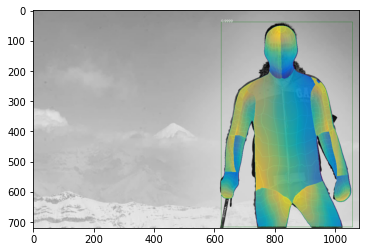

In [21]:
image = io.imread('image_densepose_contour.0001.png')
plt.imshow(image)
plt.show()